<a href="https://colab.research.google.com/github/OlyaMizonova/Labs-in-colab/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_1_%D0%BF%D0%BE_%D1%81%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%BC%D1%83_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%BE%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$L=K-U$$
$$U(x)=\frac{x^6}{6}-\frac{5x^4}{4}+2x^2$$
$$K=\frac{m\dot{x}^{2}}{2}$$
$$L=\frac{m\dot{x}^{2}}{2}-\frac{x^6}{6}+\frac{5x^4}{4}-2x^2 \\
\text{Уравнение движения: } \\ \ddot{x}+x^5-5x^3-4x=0
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import eig

In [ ]:
def rhs(t, X):
  x, y = X
  return [y, -x**5+5*x**3-4*x]

In [ ]:
def F_vect_num(X):
  x, y = X
  a = np.array([[0, 1], [-5*x**4+15*x**2-4,0]])
  w, v = eig(a)#numbers w = [p1,p2], vectors v = [[a11,a12],[a21,a22]]
  return [w, v]

In [ ]:
def eq_quiver(rhs, limits, N=16):
  xlims,ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N,N))
  V = np.zeros((N,N))
  for i,y in enumerate(ys):
    for j,x in enumerate(xs):
      vfield = rhs(0.,[x,y])
      u,v = vfield
      U[i][j] = u
      V[i][j] = v
  return (xs, ys, U, V)
def plotonPlane(rhs,limits):
  plt.close()
  xlims,ylims=limits
  plt.xlim(xlims[0],xlims[1])
  plt.ylim(ylims[0],ylims[1])
  # u,v -векторы по икс и игрек в каждом узле
  xs,ys,U,V=eq_quiver(rhs,limits)
  plt.quiver(xs,ys,U,V)

In [ ]:
def drawTraect(koeff1, koeff2):
  for j in range (6):
      Sol = solve_ivp(rhs, [-5,5], ((j+1.)*((-1)**j)*koeff1, (j+1)*((-1)**(j+1.))*koeff2), method='RK45', rtol=1e-12)
      x1, y1 = Sol.y
      plt.plot(x1, y1, 'g-')

In [ ]:
def drawCentre():
  Sol0 = solve_ivp(rhs, [0,5], (0.5,0.5), method='RK45', rtol=1e-12)
  Solpl2 = solve_ivp(rhs, [0,5], (2+0.2,1.), method='RK45', rtol=1e-12)
  Solm2 = solve_ivp(rhs, [0,5], (-2-0.2,1.), method='RK45', rtol=1e-12)
  x1, y1 = Sol0.y
  x2,y2=Solpl2.y
  x3,y3=Solm2.y
  plt.plot(x1, y1, 'g-')
  plt.plot(x2, y2, 'g-')
  plt.plot(x3, y3, 'g-')
  Sol0 = solve_ivp(rhs, [0,5], (0.3,0.3), method='RK45', rtol=1e-12)
  Solpl2 = solve_ivp(rhs, [0,5], (2+0.1,1.), method='RK45', rtol=1e-12)
  Solm2 = solve_ivp(rhs, [0,5], (-2-0.1,1.), method='RK45', rtol=1e-12)
  x1, y1 = Sol0.y
  x2,y2=Solpl2.y
  x3,y3=Solm2.y
  plt.plot(x1, y1, 'g-')
  plt.plot(x2, y2, 'g-')
  plt.plot(x3, y3, 'g-')

In [ ]:
def drawSedlo():
  wmin1,vmin1=F_vect_num((-1,0))
  wmin2,vmin2=F_vect_num((1,0))
  Solmin11 = solve_ivp(rhs, [0,5], (1. - vmin2[0][0]*0.01, 0. - vmin2[0][1]*0.01), method='RK45', rtol=1e-12)
  Solmin12 = solve_ivp(rhs, [0,5], (1. + vmin2[0][0]*0.01, 0. + vmin2[0][1]*0.01), method='RK45', rtol=1e-12)
  Solmin13 = solve_ivp(rhs, [0,5], (-1. + vmin1[1][0]*0.01, 0. + vmin1[1][1]*0.01), method='RK45', rtol=1e-12)
  Solmin14 = solve_ivp(rhs, [0,5], (-1. - vmin1[1][0]*0.0001, 0. - vmin1[1][1]*0.001), method='RK45', rtol=1e-12)
  x0,y0=Solmin11.y
  x1,y1=Solmin12.y
  x2,y2=Solmin13.y
  x3,y3=Solmin14.y
  plt.plot(x0,y0,color='red',linestyle='dashed') #left down
  plt.plot(x1,y1,color='red',linestyle='dashed') #right
  plt.plot(x2,y2,color='red',linestyle='dashed') #centre up
  plt.plot(x3,y3,color='red',linestyle='dashed') #left

In [ ]:
def drawExternalTraect():
  Sol = solve_ivp(rhs, [0,10], (0, 1.5), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  plt.plot(x1, y1, 'g-')
  Sol = solve_ivp(rhs, [0,10], (0, 2.), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  plt.plot(x1, y1, 'g-')
  Sol = solve_ivp(rhs, [0,10], (0, 2.5), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  plt.plot(x1, y1, 'g-')
  Sol = solve_ivp(rhs, [0,10], (0, 3.5), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  plt.plot(x1, y1, 'g-')

In [ ]:
def drawPortr():
  plt.close()
  plotonPlane(rhs,[[-4,4],[-4,4]])
  plt.scatter(0,0, color = 'blue')
  plt.scatter(2,0, color='blue')
  plt.scatter(-2,0, color='blue')

  plt.scatter(-1,0, color='red', marker='X')
  plt.scatter(1,0, color='red', marker='X')

  drawCentre()
  drawSedlo()
  drawExternalTraect()
  plt.xlabel('X', fontweight='bold')
  plt.ylabel('Y', fontweight='bold')
  plt.title('Фазовый портрет')

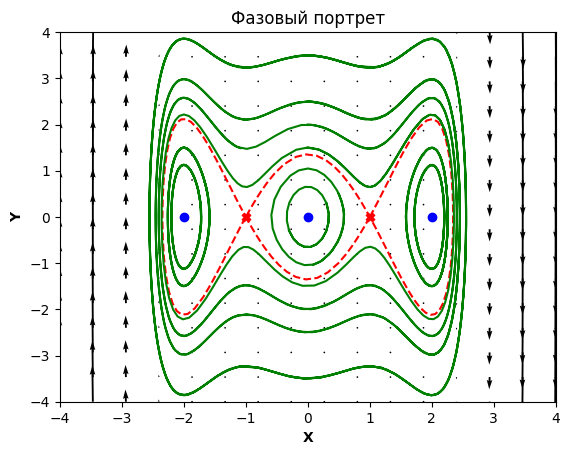

In [ ]:
drawPortr()

In [ ]:
def drawXtExternal():
  plt.close()
  Sol = solve_ivp(rhs, [0,9], (0, 1.5), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  tim = Sol.t
  plt.plot(tim,x1)
  plt.xlabel('t', fontweight='bold')
  plt.ylabel('X', fontweight='bold')
  plt.title('Одна из внешних траекторий')

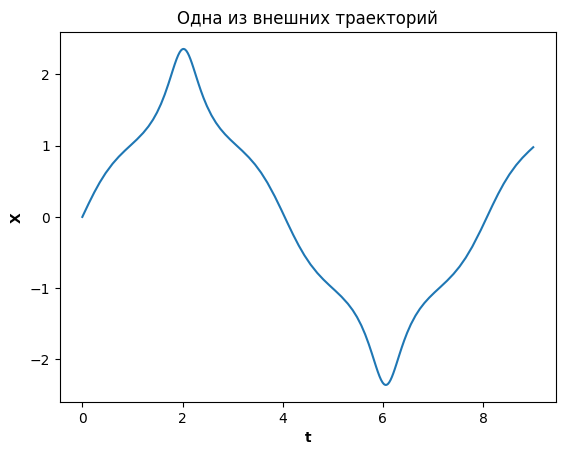

In [ ]:
drawXtExternal()

In [ ]:
def drawXtSedloSep():
  plt.close()
  wmin2,vmin2=F_vect_num((1,0))
  Sol = solve_ivp(rhs, [0,5], (1. + vmin2[0][0]*0.01, 0. + vmin2[0][1]*0.01), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  tim = Sol.t
  plt.plot(tim,x1)
  plt.xlabel('t', fontweight='bold')
  plt.ylabel('X', fontweight='bold')
  plt.title('Седло в (2,0), замкнутая правая сепаратриса')

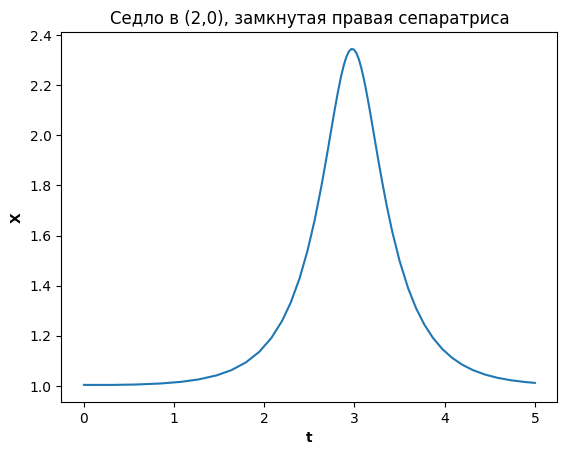

In [ ]:
drawXtSedloSep()

In [ ]:
def drawXtCentre():
  plt.close()
  Sol = solve_ivp(rhs, [0,8], (0.5, 0.5), method='RK45', rtol=1e-12)
  x1, y1 = Sol.y
  tim = Sol.t
  plt.plot(tim,x1)
  plt.xlabel('t', fontweight='bold')
  plt.ylabel('X', fontweight='bold')
  plt.title('Центр в (0,0)')

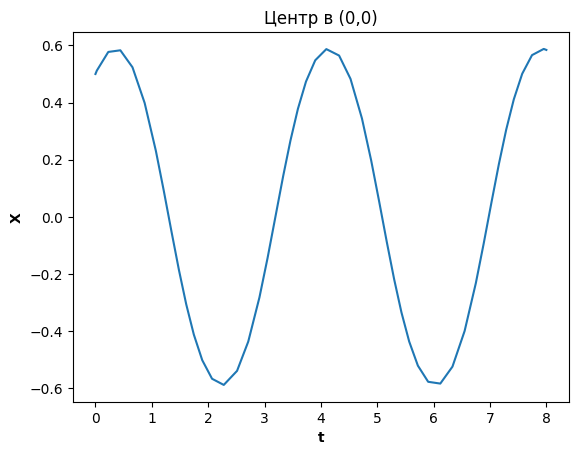

In [ ]:
drawXtCentre()